In [1]:
import pandas as pd
from pythainlp.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.preprocessing import normalize
from pythainlp.corpus import thai_stopwords
import numpy as np
import matplotlib.pyplot as plt

In [2]:
chatlog = pd.read_pickle('./data/chatlog.p') 

In [3]:
df = chatlog[['userId', 'message', 'role', '_date']] 

In [4]:
df.drop(df[df.role == "Admin"].index, inplace=True)

/Users/phrare/NTL_dashboard/NTL/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [5]:
df_11_01 = df[df._date == "2019-11-01"]

In [6]:
def get_th_tokens(text):
#     text = text.lower()
    text = text.replace('\n', ' ')
    tokens = word_tokenize(text, engine="newmm", keep_whitespace=False)
    return tokens

In [7]:
df_new = df_11_01.groupby(['userId'])['message'].apply(','.join).reset_index()

In [8]:
df_new["message_list"] = df_new["message"].apply(lambda x: x.split())

In [9]:
df_new.head()

,userId,message,message_list
0,1343993022391031,สวัสดีค่ะ,[สวัสดีค่ะ]
1,1345416482249396,ยังมีรถขับยุรึป่าวคับถ้าจะทำ,[ยังมีรถขับยุรึป่าวคับถ้าจะทำ]
2,1362041543920076,"ทำไมเค้าโทรแจ้งว่ายอดไม่เข้าค่ะ,โอนไปตั้งแต่เม...","[ทำไมเค้าโทรแจ้งว่ายอดไม่เข้าค่ะ,โอนไปตั้งแต่เ..."
3,1445140482277052,"สวัสดีครับ,สอบถามครับ,สอบถามค่างวดยังคงเหลือ ก...","[สวัสดีครับ,สอบถามครับ,สอบถามค่างวดยังคงเหลือ,..."
4,1448022578634827,"สอบถามค่ะ,ถ้าเมื่อเดือนที่แล้วเราเอามอไซค์ไปเข...","[สอบถามค่ะ,ถ้าเมื่อเดือนที่แล้วเราเอามอไซค์ไปเ..."


In [10]:
vectorizer = TfidfVectorizer(tokenizer=get_th_tokens, token_pattern=None, ngram_range=(1,2)) 

In [11]:
vectorizer.fit(df_new['message']) 

TfidfVectorizer(ngram_range=(1, 2), token_pattern=None,
                tokenizer=<function get_th_tokens at 0x1096bb5f0>)

In [12]:
feat = vectorizer.transform(df_new['message']) 
feat_arr = feat.toarray() 

In [13]:
feat_arr.shape

(483, 7393)

In [14]:
avg_tfidf = feat_arr.sum(axis=0) / np.count_nonzero(feat_arr,axis=0) 

In [15]:
result = pd.DataFrame() 
result['word'] = vectorizer.get_feature_names() 
result['avg_tfidf'] = avg_tfidf 

In [16]:
result.sort_values('avg_tfidf', ascending=False).head(10) 

,word,avg_tfidf
744,0995022465,1.000000
7389,👎🏼😎,1.000000
5944,เชฟ คะ,0.723335
3483,บุคคล,0.678260
3484,บุคคล คะ,0.678260
4194,มี แล้ว,0.657901
4917,วีออส 2014,0.647026
5038,สนใจ ค่ะ,0.646058
1393,test,0.613723
14,+ ค่ะ,0.599278


In [17]:
def filter_words(text):
    text = text.replace('\n', ' ') 
    text = text.replace(',', ' ')
    stop_words = set(thai_stopwords()) 
    tokens = word_tokenize(text, engine="newmm", keep_whitespace=False) 
    filtered_text = [] 
    for w in tokens: 
        if w not in stop_words: 
            filtered_text.append(w) 
    return filtered_text

In [18]:
filter_words("ฉันไปเรียนค่ะ")

['เรียน']

In [19]:
df_new["message_filtered"] = df_new["message"].apply(lambda x : filter_words(x)) 

In [20]:
df_new.head()

,userId,message,message_list,message_filtered
0,1343993022391031,สวัสดีค่ะ,[สวัสดีค่ะ],[สวัสดี]
1,1345416482249396,ยังมีรถขับยุรึป่าวคับถ้าจะทำ,[ยังมีรถขับยุรึป่าวคับถ้าจะทำ],"[ยังมี, รถ, ขับ, ยุ, ป่าว, คับ, ทำ]"
2,1362041543920076,"ทำไมเค้าโทรแจ้งว่ายอดไม่เข้าค่ะ,โอนไปตั้งแต่เม...","[ทำไมเค้าโทรแจ้งว่ายอดไม่เข้าค่ะ,โอนไปตั้งแต่เ...","[เค้า, โทร, แจ้ง, ยอด, โอน, โอน, เงิน, ยอด]"
3,1445140482277052,"สวัสดีครับ,สอบถามครับ,สอบถามค่างวดยังคงเหลือ ก...","[สวัสดีครับ,สอบถามครับ,สอบถามค่างวดยังคงเหลือ,...","[สวัสดี, สอบถาม, สอบถาม, ค่างวด, คงเหลือ, กี่,..."
4,1448022578634827,"สอบถามค่ะ,ถ้าเมื่อเดือนที่แล้วเราเอามอไซค์ไปเข...","[สอบถามค่ะ,ถ้าเมื่อเดือนที่แล้วเราเอามอไซค์ไปเ...","[สอบถาม, เมื่อเดือนที่แล้ว, มอไซค์, เงิน, เต็ม..."


In [21]:
def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(s)) 

In [22]:
df_new['message_filtered'] = df_new['message_filtered'].apply(listToString)

In [23]:
df_new['len_msg'] = df_new['message_filtered'].apply(len)

In [24]:
df_new.head()

,userId,message,message_list,message_filtered,len_msg
0,1343993022391031,สวัสดีค่ะ,[สวัสดีค่ะ],สวัสดี,6
1,1345416482249396,ยังมีรถขับยุรึป่าวคับถ้าจะทำ,[ยังมีรถขับยุรึป่าวคับถ้าจะทำ],ยังมี รถ ขับ ยุ ป่าว คับ ทำ,27
2,1362041543920076,"ทำไมเค้าโทรแจ้งว่ายอดไม่เข้าค่ะ,โอนไปตั้งแต่เม...","[ทำไมเค้าโทรแจ้งว่ายอดไม่เข้าค่ะ,โอนไปตั้งแต่เ...",เค้า โทร แจ้ง ยอด โอน โอน เงิน ยอด,34
3,1445140482277052,"สวัสดีครับ,สอบถามครับ,สอบถามค่างวดยังคงเหลือ ก...","[สวัสดีครับ,สอบถามครับ,สอบถามค่างวดยังคงเหลือ,...",สวัสดี สอบถาม สอบถาม ค่างวด คงเหลือ กี่ งวด 56...,121
4,1448022578634827,"สอบถามค่ะ,ถ้าเมื่อเดือนที่แล้วเราเอามอไซค์ไปเข...","[สอบถามค่ะ,ถ้าเมื่อเดือนที่แล้วเราเอามอไซค์ไปเ...",สอบถาม เมื่อเดือนที่แล้ว มอไซค์ เงิน เต็ม เต็ม...,150


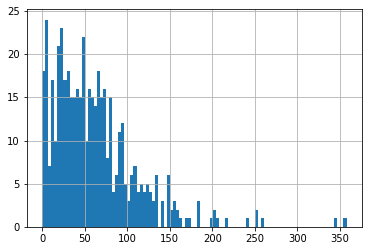

In [25]:
df_new['len_msg'].hist(bins=100)

In [26]:
vectorizer = TfidfVectorizer(tokenizer=get_th_tokens, token_pattern=None, ngram_range=(1,2)) 

In [27]:
vectorizer.fit(df_new['message_filtered']) 

TfidfVectorizer(ngram_range=(1, 2), token_pattern=None,
                tokenizer=<function get_th_tokens at 0x1096bb5f0>)

In [28]:
feat_filtered = vectorizer.transform(df_new['message']) 
feat_filtered_arr = feat_filtered.toarray() 

In [29]:
feat_filtered_arr.shape

(483, 5263)

In [30]:
avg_tfidf = feat_filtered_arr.sum(axis=0) / np.count_nonzero(feat_filtered_arr,axis=0) 

/Users/phrare/NTL_dashboard/NTL/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [31]:
result_filtered = pd.DataFrame() 
result_filtered['word'] = vectorizer.get_feature_names() 
result_filtered['avg_tfidf'] = avg_tfidf 

In [32]:
result_filtered.sort_values('avg_tfidf', ascending=False).head(10) 

,word,avg_tfidf
2385,บุคคล,1.000000
5253,👎🏼😎,1.000000
217,0995022465,1.000000
2730,พรบ.,0.909597
864,true,0.853087
1771,ตกงาน,0.837272
847,test,0.805519
4970,ใจดี,0.778228
2196,นครสวรรค์,0.767707
2113,ที่อยู่,0.751388


In [44]:
string = "This is a dinosaur 🦖"

In [49]:
print(remove_emoji(string))

This is a dinosaur 


In [50]:
s1 = "ตลกจัง 😂"

In [52]:
remove_emoji(s1)

'ตลกจัง '

In [48]:
import re
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [56]:
df_new['message_filtered_demoji'] = df_new['message_filtered'].apply(remove_emoji)

In [57]:
df_new.head()

,userId,message,message_list,message_filtered,len_msg,message_filtered_demoji
0,1343993022391031,สวัสดีค่ะ,[สวัสดีค่ะ],สวัสดี,6,สวัสดี
1,1345416482249396,ยังมีรถขับยุรึป่าวคับถ้าจะทำ,[ยังมีรถขับยุรึป่าวคับถ้าจะทำ],ยังมี รถ ขับ ยุ ป่าว คับ ทำ,27,ยังมี รถ ขับ ยุ ป่าว คับ ทำ
2,1362041543920076,"ทำไมเค้าโทรแจ้งว่ายอดไม่เข้าค่ะ,โอนไปตั้งแต่เม...","[ทำไมเค้าโทรแจ้งว่ายอดไม่เข้าค่ะ,โอนไปตั้งแต่เ...",เค้า โทร แจ้ง ยอด โอน โอน เงิน ยอด,34,เค้า โทร แจ้ง ยอด โอน โอน เงิน ยอด
3,1445140482277052,"สวัสดีครับ,สอบถามครับ,สอบถามค่างวดยังคงเหลือ ก...","[สวัสดีครับ,สอบถามครับ,สอบถามค่างวดยังคงเหลือ,...",สวัสดี สอบถาม สอบถาม ค่างวด คงเหลือ กี่ งวด 56...,121,สวัสดี สอบถาม สอบถาม ค่างวด คงเหลือ กี่ งวด 56...
4,1448022578634827,"สอบถามค่ะ,ถ้าเมื่อเดือนที่แล้วเราเอามอไซค์ไปเข...","[สอบถามค่ะ,ถ้าเมื่อเดือนที่แล้วเราเอามอไซค์ไปเ...",สอบถาม เมื่อเดือนที่แล้ว มอไซค์ เงิน เต็ม เต็ม...,150,สอบถาม เมื่อเดือนที่แล้ว มอไซค์ เงิน เต็ม เต็ม...


In [59]:
vectorizer = TfidfVectorizer(tokenizer=get_th_tokens, token_pattern=None, ngram_range=(1,2)) 
vectorizer.fit(df_new['message_filtered_demoji']) 

TfidfVectorizer(ngram_range=(1, 2), token_pattern=None,
                tokenizer=<function get_th_tokens at 0x1096bb5f0>)

In [60]:
feat_filtered_emoji = vectorizer.transform(df_new['message']) 
feat_filtered_emoji_arr = feat_filtered_emoji.toarray() 

In [61]:
avg_tfidf = feat_filtered_emoji_arr.sum(axis=0) / np.count_nonzero(feat_filtered_emoji_arr,axis=0) 
result_filtered_emoji = pd.DataFrame() 
result_filtered_emoji['word'] = vectorizer.get_feature_names() 
result_filtered_emoji['avg_tfidf'] = avg_tfidf 

/Users/phrare/NTL_dashboard/NTL/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [62]:
result_filtered_emoji.sort_values('avg_tfidf', ascending=False).head(10) 

,word,avg_tfidf
2385,บุคคล,1.000000
217,0995022465,1.000000
2729,พรบ.,0.909597
864,true,0.853087
1771,ตกงาน,0.837272
847,test,0.805519
4967,ใจดี,0.778228
2196,นครสวรรค์,0.767707
2113,ที่อยู่,0.751388
3854,สินเชื่อ รถ,0.691555


In [82]:
def remove_digits(text):
    no_digits = []
    # Iterate through the string, adding non-numbers to the no_digits list
    for i in text:
        if not i.isdigit():
            no_digits.append(i)

    # Now join all elements of the list with '', 
    # which puts all of the characters together.
    result = ''.join(no_digits)
    return result

In [63]:
def no_digits(text):
    output = re.sub(r'\d+', '', text)
    return output

In [67]:
s2 = 'แพร 12384975021'

In [68]:
no_digits(s2)

'แพร '

In [69]:
df_new['message_filtered_emo_and_digits'] = df_new['message_filtered_demoji'].apply(no_digits)

In [70]:
df_new.head()

,userId,message,message_list,message_filtered,len_msg,message_filtered_demoji,message_filtered_emo_and_digits
0,1343993022391031,สวัสดีค่ะ,[สวัสดีค่ะ],สวัสดี,6,สวัสดี,สวัสดี
1,1345416482249396,ยังมีรถขับยุรึป่าวคับถ้าจะทำ,[ยังมีรถขับยุรึป่าวคับถ้าจะทำ],ยังมี รถ ขับ ยุ ป่าว คับ ทำ,27,ยังมี รถ ขับ ยุ ป่าว คับ ทำ,ยังมี รถ ขับ ยุ ป่าว คับ ทำ
2,1362041543920076,"ทำไมเค้าโทรแจ้งว่ายอดไม่เข้าค่ะ,โอนไปตั้งแต่เม...","[ทำไมเค้าโทรแจ้งว่ายอดไม่เข้าค่ะ,โอนไปตั้งแต่เ...",เค้า โทร แจ้ง ยอด โอน โอน เงิน ยอด,34,เค้า โทร แจ้ง ยอด โอน โอน เงิน ยอด,เค้า โทร แจ้ง ยอด โอน โอน เงิน ยอด
3,1445140482277052,"สวัสดีครับ,สอบถามครับ,สอบถามค่างวดยังคงเหลือ ก...","[สวัสดีครับ,สอบถามครับ,สอบถามค่างวดยังคงเหลือ,...",สวัสดี สอบถาม สอบถาม ค่างวด คงเหลือ กี่ งวด 56...,121,สวัสดี สอบถาม สอบถาม ค่างวด คงเหลือ กี่ งวด 56...,สวัสดี สอบถาม สอบถาม ค่างวด คงเหลือ กี่ งวด ค...
4,1448022578634827,"สอบถามค่ะ,ถ้าเมื่อเดือนที่แล้วเราเอามอไซค์ไปเข...","[สอบถามค่ะ,ถ้าเมื่อเดือนที่แล้วเราเอามอไซค์ไปเ...",สอบถาม เมื่อเดือนที่แล้ว มอไซค์ เงิน เต็ม เต็ม...,150,สอบถาม เมื่อเดือนที่แล้ว มอไซค์ เงิน เต็ม เต็ม...,สอบถาม เมื่อเดือนที่แล้ว มอไซค์ เงิน เต็ม เต็ม...


In [71]:
vectorizer = TfidfVectorizer(tokenizer=get_th_tokens, token_pattern=None, ngram_range=(1,2)) 
vectorizer.fit(df_new['message_filtered_emo_and_digits']) 

TfidfVectorizer(ngram_range=(1, 2), token_pattern=None,
                tokenizer=<function get_th_tokens at 0x1096bb5f0>)

In [72]:
feat_filtered_all = vectorizer.transform(df_new['message']) 
feat_filtered_all_arr = feat_filtered_all.toarray() 

In [73]:
avg_tfidf = feat_filtered_all_arr.sum(axis=0) / np.count_nonzero(feat_filtered_all_arr,axis=0) 
result_filtered_all = pd.DataFrame() 
result_filtered_all['word'] = vectorizer.get_feature_names() 
result_filtered_all['avg_tfidf'] = avg_tfidf 

/Users/phrare/NTL_dashboard/NTL/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [74]:
result_filtered_all.sort_values('avg_tfidf', ascending=False).head(10) 

,word,avg_tfidf
1812,บุคคล,1.000000
2158,พรบ.,0.926082
286,true,0.853087
1206,ตกงาน,0.837272
269,test,0.805519
4365,ใจดี,0.778228
1625,นครสวรรค์,0.767707
23,+...ใหม,0.758638
1544,ที่อยู่,0.751388
3402,ห้,0.707107
